In [283]:
import numpy as np
import time

### MDP1: Bounded Random Walk

##### 
States (S): {0, 1, 2, 3, 4, 5}
Actions (A): {left, right}
Transition probabilities (P): When in states 1 to 4, the agent moves left with a probability of 0.5 and right with a probability of 0.5. In state 0, the agent cannot move left, and in state 5, it cannot move right. We can represent these probabilities using a transition matrix.
Rewards (R): The agent receives a reward of 0 for reaching the left boundary (state 0) and a reward of 1 for reaching the right boundary (state 5). All other transitions have a reward of 0.
Discount factor (γ): Set to a value between 0 and 1, such as 0.9, to balance immediate and future rewards.


In [2]:
# Paremeters
n_states = 6
n_actions = 2
P_left = 0.5
P_right = 0.5
reward_left = 0
reward_right = 1
gamma = 0.9
threshold = 0.001

### MPD1 solve by Value Iteration 

In [37]:
# Value iteration is 
# have initial value of each state
# collect the reward of current state
# scanning the expected value of possible next states for choosing each of the action
# update the value of current state by the value maximized by an action

In [18]:
# Initialize the value function
V = np.zeros(n_states)

# Tansition probabilities
P = np.zeros((n_states, n_actions, n_states))
for s in range(1, n_states - 1):
    P[s, 0, s - 1] = P_left
    P[s, 1, s + 1] = P_right
    
P[0, 1, 1] = 1.0
P[n_states - 1, 0, n_states - 2] = 1.0

# Rewards
R = np.zeros((n_states, n_actions, n_states))
R[n_states - 2, 1, n_states - 1] = reward_right


In [21]:
# Value iteration
start_time = time.time()
while True:
    V_new = np.zeros(n_states)
    for s in range(n_states):
        q_values = np.sum(P[s]*(R[s] + gamma * V), axis = 1)
        V_new[s] = np.max(q_values)
    
    if np.max(np.abs(V - V_new)) < threshold:
        break
        
    V = V_new
    
# Compute the optimal policy
policy = np.zeros(n_states, dtype=int)
for s in range(n_states):
    q_values = np.sum(P[s]*(R[s] + gamma * V), axis = 1)
    policy[s] = np.argmax(q_values)
converge_time = time.time() - start_time
print("Optimal value function:", V)
print("Optimal policy:", policy)
print("Converge time:", converge_time)

Optimal value function: [0.06816712 0.0762377  0.16941712 0.37747541 0.83883424 0.75495082]
Optimal policy: [1 1 1 1 1 0]
Converge time: 0.0016078948974609375


### MPD1 solve by Policy Iteration

In [38]:
# Policy iteration is
# Have initial policy for each state
# Given the policy, update value function for each state as
        # collect current reward
        # scan possible next state with the given action
        # until the value is converging
        
              # for each of the state and each of the action update the value function
              # choose the action that maximize the value function
              # update policy 
              # until the policy converge
        

In [32]:
# Initialize the policy
policy = np.zeros(n_states, dtype=int)

def evaluate_policy(policy, P, R, gamma, threshold):
    V = np.zeros(n_states)
    while True:
        V_new = np.zeros(n_states)
        for s in range(n_states):
            a = policy[s]
            V_new[s] = np.sum(P[s, a]*(R[s, a] + gamma * V))
        
        if np.max(np.abs(V - V_new)) < threshold:
            break
            
        V = V_new
    return V

In [33]:
# Policy iteration
start_time = time.time()
policy_stable = False

while not policy_stable:
    V = evaluate_policy(policy, P, R, gamma, threshold)
    policy_stable = True
    for s in range(n_states):
        old_action = policy[s]
        q_values = np.sum(P[s]*(R[s] + gamma * V), axis = 1)
        policy[s] = np.argmax(q_values)
        
        if old_action != policy[s]:
            policy_stable = False
converge_time = time.time() - start_time

print("Optimal value function:", V)
print("Optimal policy:", policy)
print("Converge time:", converge_time)


Optimal value function: [0.06816712 0.0762377  0.16941712 0.37747541 0.83883424 0.75495082]
Optimal policy: [1 1 1 1 1 0]
Converge time: 0.018410205841064453


### MDP1 solve by Q-learning

In [49]:
# Q-learning is
# initialize Q function
# random select a state
     # with certain probability, choose the action to maximize Q function or random select an action
     # knowing the next state it will achieve by choosing the action above
     # collect the reward of this move
     # update the Q function for current state and chosen action with a learning rate on the delta Q

In [44]:
import numpy as np

# Parameters
n_states = 6
n_actions = 2
P_left = 0.5
P_right = 0.5
reward_left = 0
reward_right = 1
gamma = 0.9
threshold = 0.001
alpha = 0.1
n_episodes = 10000

# Transition function
def transition(s, a):
    if s == 0 and a == 1:
        return 1
    elif s == n_states - 1 and a == 0:
        return n_states - 2
    elif a == 0:
        return s - 1
    else:
        return s + 1

# Reward function
def reward(s, a, s_next):
    if s == n_states - 2 and a == 1:
        return reward_right
    else:
        return 0

# Q-learning
Q = np.zeros((n_states, n_actions))
start_time = time.time()
for episode in range(n_episodes):
    s = np.random.randint(1, n_states - 1)  # Start in a random state, excluding boundaries
    done = False
    
    while not done:
        a = np.argmax(Q[s]) if np.random.rand() > 0.1 else np.random.randint(n_actions)
        s_next = transition(s, a)
        r = reward(s, a, s_next)
        
        Q[s, a] = Q[s, a] + alpha * (r + gamma * np.max(Q[s_next]) - Q[s, a])
        
        if s_next == 0 or s_next == n_states - 1:
            done = True
        else:
            s = s_next

# Derive the optimal policy from the Q-values
policy = np.argmax(Q, axis=1)
converge_time = time.time() - start_time

print("Q-values:", Q)
print("Optimal policy:", policy)
print("Converge time:", converge_time)


Q-values: [[0.     0.    ]
 [0.     0.729 ]
 [0.6561 0.81  ]
 [0.729  0.9   ]
 [0.81   1.    ]
 [0.     0.    ]]
Optimal policy: [0 1 1 1 1 0]
Converge time: 0.2550489902496338


### MDP2: Taxi-v3

In [45]:
# The Taxi Problem is a classic example of an MDP with a larger number of states. 
# It involves a taxi navigating a 5x5 grid to pick up a passenger and drop them off at their destination. 
# The MDP is defined as follows:

# States (S): Each cell in the grid has four possible locations for the passenger and four possible destinations, 
# resulting in 5x5x5x4 = 500 states in total.
# Actions (A): The agent can move in 4 directions (up, down, left, and right), pick up a passenger, or drop off a passenger, totaling 6 actions.
# Transition probabilities (P): The agent moves deterministically, except when hitting a wall, in which case it stays in the current state.
# Rewards (R): The agent receives a reward of -1 for each step it takes, -10 for illegal pick-up/drop-off actions, and +20 for successfully dropping off a passenger at their destination.
# Discount factor (γ): Typically set to a value between 0 and 1, such as 0.9, to balance immediate and future rewards.


In [46]:
!pip install gym

### MDP2 solve by Value Iteration

In [221]:
import numpy as np
import gym

# Load the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Get the number of states and actions from the environment
n_states = env.observation_space.n
n_actions = env.action_space.n

# Value iteration
V = np.zeros(n_states)
threshold = 0.001
gamma = 0.9
start_time = time.time()
n = 0
V_delta_list = []
while True:
    V_new = np.zeros(n_states)
    for s in range(n_states):
        q_values = np.zeros(n_actions)
        for a in range(n_actions):
            for prob, s_next, r, done in env.P[s][a]:
                q_values[a] += prob * (r + gamma * V[s_next])
        V_new[s] = np.max(q_values)
    V_delta_list.append(np.max(np.abs(V - V_new)))
    if np.max(np.abs(V - V_new)) < threshold:
        break
    
    V = V_new
    
    n += 1

# Compute the optimal policy
policy = np.zeros(n_states, dtype=int)
for s in range(n_states):
    q_values = np.zeros(n_actions)
    for a in range(n_actions):
        for prob, s_next, r, done in env.P[s][a]:
            q_values[a] += prob * (r + gamma * V[s_next])
    policy[s] = np.argmax(q_values)
converge_time = time.time() - start_time

print("Optimal policy:", policy)
print("Converge time:", converge_time)
print("Number of iteration:", n)



Optimal policy: [4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 5 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 1 2 0 2 1 1
 1 1 2 2 2 2 3 3 3 3 2 2 2 2 1 2 3 2 3 3 3 3 1 1 1 1 3 3 3 3 2 2 2 2 3 1 3
 2 3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0 3 1 3 0 3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0
 3 1 3 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 4 4 4 4 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 1 1 1 5 1
 1 1 1 1 

In [222]:
def get_total_reward(env, policy):
    s = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        a = policy[s]
        s, r, done, _ = env.step(a)
        total_reward += r
    return total_reward

In [223]:
n_episodes = 1000
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 1000 episodes: 7.933


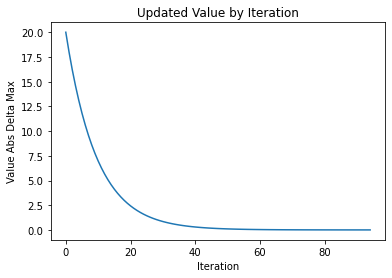

In [225]:
plt.plot(np.arange(n+1), V_delta_list)
plt.xlabel('Iteration')
plt.ylabel('Value Abs Delta Max')
plt.title('Updated Value by Iteration')
plt.savefig('MDP2_value_update.jpg')
plt.show()

### MDP2 solve by Policy Iteration

In [252]:
import numpy as np
import gym

# Load the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Get the number of states and actions from the environment
n_states = env.observation_space.n
n_actions = env.action_space.n

# Policy evaluation
def evaluate_policy(policy, env, gamma, threshold):
    V = np.zeros(n_states)
    n = 0
    V_delta_list = []
    
    while True:
        V_new = np.zeros(n_states)
        for s in range(n_states):
            a = policy[s]
            for prob, s_next, r, done in env.P[s][a]:
                V_new[s] += prob * (r + gamma * V[s_next])
        n += 1
        V_delta_list.append(np.max(np.abs(V - V_new)))
        if np.max(np.abs(V - V_new)) < threshold:
            break
       
        V = V_new
        
    return V, V_delta_list, n

# Initialize the policy
policy = np.zeros(n_states, dtype=int)

# Policy iteration
gamma = 0.9
threshold = 0.001
policy_stable = False
start_time = time.time()
i = 0
value_max_list = []
while not policy_stable:
    V, V_delta_list, n = evaluate_policy(policy, env, gamma, threshold)
    i += n
    value_max_list = value_max_list + V_delta_list
    
    policy_stable = True
    for s in range(n_states):
        old_action = policy[s]
        q_values = np.zeros(n_actions)
        for a in range(n_actions):
            for prob, s_next, r, done in env.P[s][a]:
                q_values[a] += prob * (r + gamma * V[s_next])
        policy[s] = np.argmax(q_values)
        
        if old_action != policy[s]:
            policy_stable = False
converge_time = time.time() - start_time

print("Optimal policy:", policy)
print("Converge time:", converge_time)
print("Number of iterations:", i)


Optimal policy: [4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 5 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 1 2 0 2 1 1
 1 1 2 2 2 2 3 3 3 3 2 2 2 2 1 2 3 2 3 3 3 3 1 1 1 1 3 3 3 3 2 2 2 2 3 1 3
 2 3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0 3 1 3 0 3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0
 3 1 3 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 4 4 4 4 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 1 1 1 5 1
 1 1 1 1 

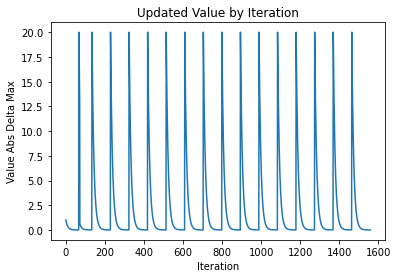

In [245]:
plt.plot(np.arange(len(value_max_list)), value_max_list)
plt.xlabel('Iteration')
plt.ylabel('Value Abs Delta Max')
plt.title('Updated Value by Iteration')
plt.savefig('MDP2_policy_update.jpg')
plt.show()

In [228]:
n_episodes = 1000
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 1000 episodes: 8.009


### MDP2 solve by Q-Learning with Epsilon-greedy exploration strategy

In [334]:
################
# DO NOT REMOVE
# Versions
# gym==0.17.2
# numpy==1.18.0
################

class QLearningAgent(object):
    def __init__(self):
        self.whoami = 'gatechid'


    def solve(self):
        """Create the Q table"""
        env = gym.make("Taxi-v3").env
        state_n = env.observation_space.n
        action_n = env.action_space.n
        q_table = np.zeros([state_n, action_n])
        alpha = 0.5
        gamma = 0.9
        epsilon = 0.6
        n_episodes = 5000
        q_table = np.zeros([state_n, action_n])
        
        # define choose_action function
        def choose_action(state, epsilon):
            """Choose action base on greedy epsilon method"""
            p = np.random.uniform(0, 1)
            if p < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            return action
        
        V_mean_list = []
        start_time = time.time()
        for n in range(n_episodes):  
            state = env.reset()
            state_list = [state]
            action_list = []
            done = False


            while not done:

                action = choose_action(state, epsilon)
                # from State, taken action, what is the next state, award, termination?
                next_state, reward, done, info = env.step(action)
                prev_q = q_table[state, action]
                next_max_q = np.max(q_table[next_state])
                new_q = (1 - alpha) * prev_q + alpha * (reward + gamma * next_max_q)
                q_table[state, action] = new_q
                V_mean = np.max(q_table, axis = 1).mean()
                V_mean_list.append(V_mean)

                state = next_state
                state_list.append(state)
                action_list.append(action)
        converge_time = time.time() - start_time
        print("Converge time:", converge_time)

        
        self.Q = q_table
        return q_table, converge_time, V_mean_list

    def Q_table(self, state, action):
        """return the optimal value for State-Action pair in the Q Table"""
        return self.Q[state][action]

In [335]:
q_table, converge_time, V_mean_list = QLearningAgent().solve()

Converge time: 12.05768895149231


In [336]:
policy = np.argmax(q_table, axis = 1)

In [337]:
n_episodes = 1000
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 1000 episodes: 7.838


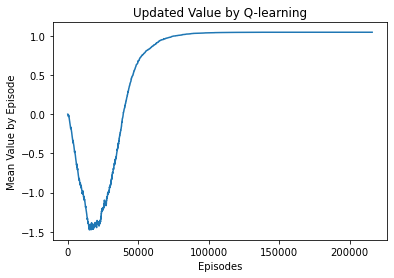

Number of iteration: 215860
Optimal policy: [0 4 4 4 2 0 0 2 0 0 0 0 0 0 2 0 5 0 0 0 0 3 3 3 0 0 0 0 0 3 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 0 0 2 0 2 0 0 3 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 3 3 4 0 4 4 3 0 0 3 3 3 0 0 0 5 0 0 0 1 1 1 2 0 2 2 0 0 0
 0 2 2 2 0 1 0 0 0 0 1 1 1 0 0 0 0 3 3 0 3 0 0 0 0 1 0 0 0 0 0 0 0 2 0 2 2
 0 0 0 0 0 0 2 0 0 1 0 0 0 3 3 0 1 0 1 2 0 3 0 0 0 0 0 0 0 1 0 0 0 3 0 0 1
 0 1 1 0 3 0 3 0 3 3 0 3 1 0 0 0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 1
 1 1 2 0 2 2 3 3 0 3 2 2 2 0 1 2 3 2 0 3 3 3 2 0 1 1 3 3 0 3 2 2 2 0 3 1 3
 2 0 3 3 3 1 0 1 2 3 3 0 3 0 0 0 0 3 1 3 0 0 3 3 3 1 0 1 1 3 3 0 3 0 0 3 0
 3 1 3 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 2 1 1 1 0 1 2
 2 1 0 1 2 1 2 0 3 3 3 1 0 1 1 3 3 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 2 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 3 1 1 1 0 1 1 3 3 0 1 3 3 0 0 3 1 3 0 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 1 0 1 1 1 1 0 1 2 1 2 0 1 1 1 1 0 3 1 1
 1 0 1 1 1 3 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1

In [338]:
plt.plot(np.arange(len(V_mean_list)), V_mean_list)
plt.xlabel('Episodes')
plt.ylabel('Mean Value by Episode')
plt.title('Updated Value by Q-learning')
plt.savefig('MDP2_Qlearning_update.jpg')
plt.show()
print("Number of iteration:", len(V_mean_list))
print("Optimal policy:", policy)
print("Converge time:", converge_time)

### MDP2 solved by Q-learning with Eplison decreasing exploration strategy

In [339]:
import numpy as np
import gym

env = gym.make('Taxi-v3')

n_states = env.observation_space.n
n_actions = env.action_space.n

# Initialize the Q-table
Q = np.zeros((n_states, n_actions))

# Q-learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
n_episodes = 5000

V_mean_list = []

start_time = time.time()
for episode in range(n_episodes):
    state = env.reset()
    done = False

    while not done:
        # Choose action using epsilon-decreasing exploration strategy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        # Take action and observe next state, reward, and done
        next_state, reward, done, _ = env.step(action)

        # Update Q-table using Q-learning update rule
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        V_mean = np.max(Q, axis = 1).mean()
        V_mean_list.append(V_mean)

        state = next_state

    # Decrease epsilon over episodes
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
total_time = time.time() - start_time
# Compute the optimal policy
policy = np.argmax(Q, axis=1)
print("Optimal policy:", policy)
print("Total time:", total_time)


Optimal policy: [0 4 4 4 0 0 2 2 0 0 0 0 0 2 2 0 5 0 0 0 0 3 3 3 0 0 0 0 0 3 0 0 0 0 0 0 3
 0 3 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 3 0 4 0 4 4 0 3 0 0 0 0 3 0 0 5 3 3 0 1 1 1 0 0 0 0 0 0 0
 0 2 0 0 0 1 2 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 2 0 2 2
 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 3 1 0 1 2 3 3 0 3 0 0 0 0 0 2 0 0 0 3 3 3 1
 0 1 1 3 0 0 0 3 3 0 0 3 1 3 3 0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 3
 3 1 2 0 2 2 3 3 0 3 2 2 2 0 3 2 3 2 0 3 3 3 2 0 2 1 3 3 0 3 2 2 2 0 3 1 3
 2 0 3 3 3 2 0 1 1 3 3 0 3 0 0 0 0 3 1 3 0 0 3 3 3 1 0 1 1 3 3 0 3 0 3 3 0
 3 1 3 3 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 2 1 1 1 0 1 1
 1 1 0 1 3 1 2 0 3 1 1 1 0 1 1 1 3 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 1 3 3 1 0 1 1 3 1 0 3 3 3 0 0 2 1 3 3 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 2 2 2 0 0 1 1 1
 1 0 1 1 1 1 0 3 1 1 1 0 0 2 0 3 0 1 1 1 1 0 1 2 1 1 0 1 4 4 4 0 1 1 1 5 0
 3 1 3 1 

In [340]:
n_episodes = 1000
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 1000 episodes: 7.946


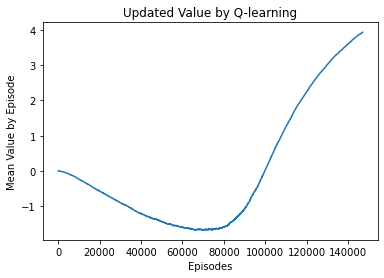

Number of iteration: 146902
Optimal policy: [0 4 4 4 0 0 2 2 0 0 0 0 0 2 2 0 5 0 0 0 0 3 3 3 0 0 0 0 0 3 0 0 0 0 0 0 3
 0 3 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 3 0 4 0 4 4 0 3 0 0 0 0 3 0 0 5 3 3 0 1 1 1 0 0 0 0 0 0 0
 0 2 0 0 0 1 2 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 2 0 2 2
 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 3 1 0 1 2 3 3 0 3 0 0 0 0 0 2 0 0 0 3 3 3 1
 0 1 1 3 0 0 0 3 3 0 0 3 1 3 3 0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 3
 3 1 2 0 2 2 3 3 0 3 2 2 2 0 3 2 3 2 0 3 3 3 2 0 2 1 3 3 0 3 2 2 2 0 3 1 3
 2 0 3 3 3 2 0 1 1 3 3 0 3 0 0 0 0 3 1 3 0 0 3 3 3 1 0 1 1 3 3 0 3 0 3 3 0
 3 1 3 3 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 2 1 1 1 0 1 1
 1 1 0 1 3 1 2 0 3 1 1 1 0 1 1 1 3 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 1 3 3 1 0 1 1 3 1 0 3 3 3 0 0 2 1 3 3 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 2 2 2 0 0 1 1 1
 1 0 1 1 1 1 0 3 1 1 1 0 0 2 0 3 0 1 1 1 1 0 1 2 1 1 0 1

In [341]:
plt.plot(np.arange(len(V_mean_list)), V_mean_list)
plt.xlabel('Episodes')
plt.ylabel('Mean Value by Episode')
plt.title('Updated Value by Q-learning')
plt.savefig('MDP2_Qlearning_update.jpg')
plt.show()
print("Number of iteration:", len(V_mean_list))
print("Optimal policy:", policy)
print("Converge time:", total_time)

### MDP2 solved by Q-learning with Upper Confidence Bound (UCB)

In [342]:
import numpy as np
import gym

def ucb_exploration(Q, N, state, c):
    q_values = Q[state]
    n_visits = N[state]
    exploration_bonus = c * np.sqrt(np.log(np.sum(n_visits)) / (n_visits + 1e-6))
    ucb_values = q_values + exploration_bonus
    action = np.argmax(ucb_values)
    return action

env = gym.make('Taxi-v3')

n_states = env.observation_space.n
n_actions = env.action_space.n

# Initialize the Q-table and visit counts
Q = np.zeros((n_states, n_actions))
N = np.zeros((n_states, n_actions))

# Q-learning parameters
alpha = 0.1
gamma = 0.99
c = 0.1
n_episodes = 5000
start_time = time.time()
V_mean_list = []
for episode in range(n_episodes):
    state = env.reset()
    done = False

    while not done:
        # Choose action using UCB exploration strategy
        action = ucb_exploration(Q, N, state, c)

        # Take action and observe next state, reward, and done
        next_state, reward, done, _ = env.step(action)

        # Update Q-table using Q-learning update rule
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        V_mean = np.max(Q, axis = 1).mean()
        V_mean_list.append(V_mean)

        # Update visit counts
        N[state, action] += 1

        state = next_state
total_time = time.time() - start_time
# Compute the optimal policy
policy = np.argmax(Q, axis=1)
print("Optimal policy:", policy)
print("Total_time:", total_time)



/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_81486/3381205512.py:7: RuntimeWarning: divide by zero encountered in log
  exploration_bonus = c * np.sqrt(np.log(np.sum(n_visits)) / (n_visits + 1e-6))
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_81486/3381205512.py:7: RuntimeWarning: invalid value encountered in sqrt
  exploration_bonus = c * np.sqrt(np.log(np.sum(n_visits)) / (n_visits + 1e-6))


Optimal policy: [0 4 4 4 2 0 0 0 0 0 0 0 2 2 0 0 5 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 3 0 0 0 0 0 2 0 2 2 0 0 0 0 2 0 2 0 0 1 0 0 0 0 3 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 3 4 0 4 4 3 3 0 0 3 0 3 0 0 5 0 0 0 1 1 1 2 0 0 0 0 0 0
 0 2 2 0 0 1 0 0 2 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 2 2
 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 0 1 0 2 2 0 0 0 3 0 0 0 0 3 2 0 0 0 0 0 3 1
 0 1 1 3 3 0 0 0 3 3 0 3 1 3 3 0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 1
 1 1 2 0 2 2 3 3 0 3 2 2 2 0 3 2 3 2 0 3 3 3 1 0 1 1 3 3 0 3 2 2 2 0 3 2 3
 2 0 3 3 3 1 0 1 1 3 3 0 3 0 0 0 0 3 2 3 0 0 3 3 3 1 0 1 1 3 3 0 3 3 3 3 0
 3 1 3 3 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 2 0 1 2 1 1 0 1 1
 1 1 0 3 0 1 2 0 3 1 1 1 0 1 1 1 1 0 1 1 1 1 0 2 1 1 3 0 1 1 1 2 0 2 2 1 1
 0 1 0 0 0 0 1 1 1 0 0 1 1 3 1 0 1 1 1 3 0 1 3 0 3 0 1 1 1 3 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 2 0 1 2 1 1 0 1 1 1 1 0 0 2 0 2 0 3 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 3 0 0 1 0 1 1 1 1 0 1 2 1 1 0 1 4 4 4 0 1 1 1 5 0
 3 1 1 1 

In [343]:
n_episodes = 1000
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 1000 episodes: 7.983


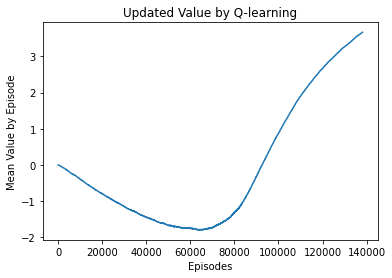

Number of iteration: 138173
Optimal policy: [0 4 4 4 2 0 0 0 0 0 0 0 2 2 0 0 5 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 3 0 0 0 0 0 2 0 2 2 0 0 0 0 2 0 2 0 0 1 0 0 0 0 3 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 3 4 0 4 4 3 3 0 0 3 0 3 0 0 5 0 0 0 1 1 1 2 0 0 0 0 0 0
 0 2 2 0 0 1 0 0 2 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 2 2
 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 0 1 0 2 2 0 0 0 3 0 0 0 0 3 2 0 0 0 0 0 3 1
 0 1 1 3 3 0 0 0 3 3 0 3 1 3 3 0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 1
 1 1 2 0 2 2 3 3 0 3 2 2 2 0 3 2 3 2 0 3 3 3 1 0 1 1 3 3 0 3 2 2 2 0 3 2 3
 2 0 3 3 3 1 0 1 1 3 3 0 3 0 0 0 0 3 2 3 0 0 3 3 3 1 0 1 1 3 3 0 3 3 3 3 0
 3 1 3 3 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 2 0 1 2 1 1 0 1 1
 1 1 0 3 0 1 2 0 3 1 1 1 0 1 1 1 1 0 1 1 1 1 0 2 1 1 3 0 1 1 1 2 0 2 2 1 1
 0 1 0 0 0 0 1 1 1 0 0 1 1 3 1 0 1 1 1 3 0 1 3 0 3 0 1 1 1 3 0 1 1 1 1 0 1
 1 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 2 0 1 2 1 1 0 1 1 1 1 0 0 2 0 2 0 3 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 3 0 0 1 0 1 1 1 1 0 1 2 1 1 0 1

In [344]:
plt.plot(np.arange(len(V_mean_list)), V_mean_list)
plt.xlabel('Episodes')
plt.ylabel('Mean Value by Episode')
plt.title('Updated Value by Q-learning')
#plt.savefig('MDP2_Qlearning_update.jpg')
plt.show()
print("Number of iteration:", len(V_mean_list))
print("Optimal policy:", policy)
print("Converge time:", total_time)

### MDP3: Mountain Car Problem

In [284]:
import matplotlib.pyplot as plt

In [285]:
import numpy as np
import gym

# Load the MountainCar-v0 environment
env = gym.make('MountainCar-v0')

# Discretize the state space
position_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], 40)
velocity_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 40)


def discretize_state(state):
    position, velocity = state
    position_idx = np.digitize(position, position_bins) - 1
    velocity_idx = np.digitize(velocity, velocity_bins) - 1
    return position_idx * (len(velocity_bins) - 1) + velocity_idx


n_states = (len(position_bins) - 1) * (len(velocity_bins) - 1)
n_actions = env.action_space.n

# Create a custom MDP
mdp = np.zeros((n_states, n_actions, n_states), dtype=[('prob', float), ('reward', float)])

n_samples = 10000
for _ in range(n_samples):
    state = env.reset()
    s = discretize_state(state)
    
    for a in range(n_actions):
        next_state, reward, _, _ = env.step(a)
        s_next = discretize_state(next_state)
        mdp[s, a, s_next]['prob'] = 1.0
        mdp[s, a, s_next]['reward'] = reward


In [286]:
n_states

1521

In [287]:
np.where(mdp['prob'] != 0)

(array([526, 526, 526, 526, 526, 565, 565, 565, 565, 565, 565, 604, 604,
        604, 604, 604, 604, 604, 643, 643, 643, 643, 643, 643, 643, 643,
        682, 682, 682, 682, 682, 682]),
 array([0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1,
        1, 2, 2, 2, 0, 0, 1, 1, 2, 2]),
 array([487, 526, 487, 526, 526, 526, 565, 526, 565, 526, 565, 565, 604,
        565, 603, 604, 565, 604, 604, 642, 643, 603, 642, 604, 642, 643,
        642, 681, 642, 681, 642, 681]))

In [299]:
set(np.where(mdp['prob'] != 0)[0])

{526, 565, 604, 643, 682}

In [302]:
set(np.where(mdp['prob'] != 0)[2])

{487, 526, 565, 603, 604, 642, 643, 681}

### MDP3 solve by Value Iteration

In [288]:
# Value iteration
V = np.zeros(n_states)
threshold = 0.001
gamma = 0.99
start_time = time.time()
n = 0
V_delta_list = []
while True:
    V_new = np.zeros(n_states)
    for s in range(n_states):
        q_values = np.sum(mdp[s]['prob'] * (mdp[s]['reward'] + gamma * V), axis=1)
        V_new[s] = np.max(q_values)
    
    n += 1
    V_delta_max = np.max(np.abs(V - V_new))
    
    if V_delta_max < threshold:
        break
        
    V_delta_list.append(V_delta_max)
    V = V_new
    
converge_time = time.time() - start_time


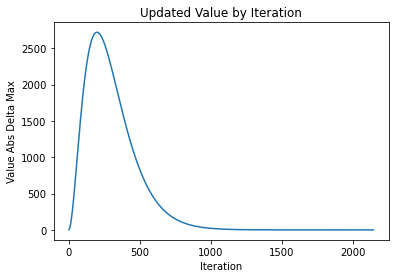

Number of iteration: 2146
Optimal policy: [0 0 0 ... 0 0 0]
Converge time: 63.15953993797302


In [289]:
plt.plot(np.arange(n-1), V_delta_list)
plt.xlabel('Iteration')
plt.ylabel('Value Abs Delta Max')
plt.title('Updated Value by Iteration')
plt.savefig('MDP3_value_update.jpg')
plt.show()

# Compute the optimal policy
policy = np.zeros(n_states, dtype=int)
for s in range(n_states):
    q_values = np.sum(mdp[s]['prob'] * (mdp[s]['reward'] + gamma * V), axis=1)
    policy[s] = np.argmax(q_values)
print("Number of iteration:", n)
print("Optimal policy:", policy)
print("Converge time:", converge_time)


In [290]:
np.where(policy!=0)

(array([526, 643]),)

In [291]:
policy[526]

2

In [292]:
policy[643]

1

In [293]:
def get_total_reward_mc(env, policy):
    s = discretize_state(env.reset())
    total_reward = 0
    done = False
    
    while not done:
        a = policy[s]
        s, r, done, _ = env.step(a)
        s = discretize_state(s)
        total_reward += r
    return total_reward

In [294]:
n_episodes = 1
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward_mc(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 1 episodes: -200.0


### MDP3 solve by Policy Iteration

In [269]:
env = gym.make('MountainCar-v0')
# Transition probabilities and rewards
P = mdp['prob']
R = mdp['reward']

# Policy evaluation
def evaluate_policy(policy, P, R, gamma, threshold):
 
    V = np.zeros(n_states)
    n = 0
    V_delta_list = []
    while True:
        V_new = np.zeros(n_states)
        for s in range(n_states):
            a = policy[s]
            V_new[s] = np.sum(P[s, a] * (R[s, a] + gamma * V))
        n += 1
        V_delta_max = np.max(np.abs(V - V_new))
        V_delta_list.append(V_delta_max)
        
        if V_delta_max < threshold:
            break
 
        
        
        V = V_new
    return V, n, V_delta_list

# Initialize the policy
#policy = np.zeros(n_states, dtype=int)
policy = np.random.choice(2, size=n_states)

# Policy iteration
gamma = 0.99
threshold = 0.001
policy_stable = False
i = 0
total_time = 0
value_max_list = []
start_time = time.time()
while not policy_stable:
    V, n, V_delta_list = evaluate_policy(policy, P, R, gamma, threshold)
    i += n
    value_max_list = value_max_list + V_delta_list
    
    policy_stable = True
    for s in range(n_states):
        old_action = policy[s]
        q_values = np.sum(P[s] * (R[s] + gamma * V), axis=1)
        policy[s] = np.argmax(q_values)
        
        if old_action != policy[s]:
            policy_stable = False
converge_time = time.time() - start_time
print("Optimal policy:", policy)


Optimal policy: [0 0 0 ... 0 0 0]


In [271]:
np.where(policy!=0)

(array([526, 643]),)

In [273]:
policy[526]

2

In [274]:
policy[643]

1

In [272]:
len(policy)

1521

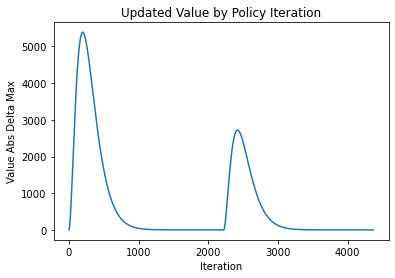

Number of iteration: 4368
Optimal policy: [0 0 0 ... 0 0 0]
Converge time: 62.999403953552246


In [267]:
plt.plot(np.arange(i), value_max_list)
plt.xlabel('Iteration')
plt.ylabel('Value Abs Delta Max')
plt.title('Updated Value by Policy Iteration')
plt.savefig('MDP3_policy_update.jpg')
plt.show()
print("Number of iteration:", i)
print("Optimal policy:", policy)
print("Converge time:", converge_time)

In [268]:
n_episodes = 100
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward_mc(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 100 episodes: -200.0


### MDP3 solve by Q-learning

In [351]:
# Discretize the state space
position_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], 40)
velocity_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 40)

def discretize_state(state):
    position, velocity = state
    position_idx = np.digitize(position, position_bins) - 1
    velocity_idx = np.digitize(velocity, velocity_bins) - 1
    return position_idx * (len(velocity_bins) - 1) + velocity_idx

n_states = (len(position_bins) - 1) * (len(velocity_bins) - 1)
n_actions = env.action_space.n

# Initialize the Q-table
Q = np.zeros((n_states, n_actions))

# Q-learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1
n_episodes = 50000
V_mean_list = []
start_time = time.time()
for episode in range(n_episodes):
    s = discretize_state(env.reset())
    done = False

    while not done:
        # Choose action using an epsilon-greedy strategy
        if np.random.rand() < epsilon:
            a = np.random.choice(n_actions)
        else:
            a = np.argmax(Q[s])

        # Execute action and observe the next state and reward
        s_next, r, done, _ = env.step(a)
        s_next = discretize_state(s_next)

        # Update Q-values using Q-learning update rule
        Q[s, a] += alpha * (r + gamma * np.max(Q[s_next]) - Q[s, a])
        V_mean = np.max(Q, axis = 1).mean()
        V_mean_list.append(V_mean)

        # Move to the next state
        s = s_next
total_time = time.time() - start_time

# Compute the optimal policy from the Q-table
policy = np.argmax(Q, axis=1)
print("Optimal policy:", policy)
print("Total time:", total_time)

Optimal policy: [0 0 0 ... 0 0 0]
Total time: 968.4948537349701


In [352]:
len(V_mean_list)

7950193

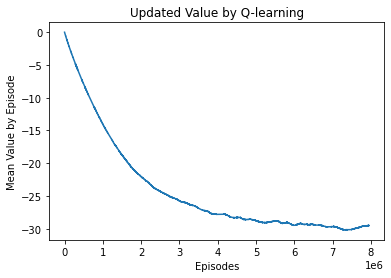

Number of iteration: 7950193
Optimal policy: [0 0 0 ... 0 0 0]
Converge time: 968.4948537349701


In [353]:
plt.plot(np.arange(len(V_mean_list)), V_mean_list)
plt.xlabel('Episodes')
plt.ylabel('Mean Value by Episode')
plt.title('Updated Value by Q-learning')
plt.savefig('MDP3_Qlearning_update.jpg')
plt.show()
print("Number of iteration:", len(V_mean_list))
print("Optimal policy:", policy)
print("Converge time:", total_time)

In [354]:
n_episodes = 100
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward_mc(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 100 episodes: -126.86


In [355]:
len(np.where(policy!=0)[0])

631

### MDP3 solve by Q-learning with epsilon-decreasing exploration strategy

In [348]:
# Discretize the state space
position_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], 40)
velocity_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 40)

def discretize_state(state):
    position, velocity = state
    position_idx = np.digitize(position, position_bins) - 1
    velocity_idx = np.digitize(velocity, velocity_bins) - 1
    return position_idx * (len(velocity_bins) - 1) + velocity_idx

n_states = (len(position_bins) - 1) * (len(velocity_bins) - 1)
n_actions = env.action_space.n

# Initialize the Q-table
Q = np.zeros((n_states, n_actions))

# Q-learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
n_episodes = 10000
V_mean_list = []
start_time = time.time()

for episode in range(n_episodes):
    s = discretize_state(env.reset())
    done = False

    while not done:
        # Choose action using an epsilon-greedy strategy
        if np.random.rand() < epsilon:
            a = np.random.choice(n_actions)
        else:
            a = np.argmax(Q[s])

        # Execute action and observe the next state and reward
        s_next, r, done, _ = env.step(a)
        s_next = discretize_state(s_next)

        # Update Q-values using Q-learning update rule
        Q[s, a] += alpha * (r + gamma * np.max(Q[s_next]) - Q[s, a])
        V_mean = np.max(Q, axis = 1).mean()
        V_mean_list.append(V_mean)

        # Move to the next state
        s = s_next
    # Decrease epsilon over episodes
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
total_time = time.time() - start_time

# Compute the optimal policy from the Q-table
policy = np.argmax(Q, axis=1)
print("Optimal policy:", policy)
print("Total time:", total_time)

Optimal policy: [0 0 0 ... 0 0 0]
Total time: 225.71402502059937


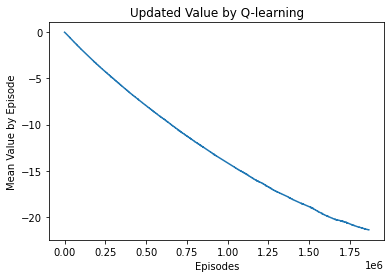

Number of iteration: 1866515
Optimal policy: [0 0 0 ... 0 0 0]
Converge time: 225.71402502059937


In [349]:
plt.plot(np.arange(len(V_mean_list)), V_mean_list)
plt.xlabel('Episodes')
plt.ylabel('Mean Value by Episode')
plt.title('Updated Value by Q-learning')
plt.savefig('MDP3_Qlearning_update.jpg')
plt.show()
print("Number of iteration:", len(V_mean_list))
print("Optimal policy:", policy)
print("Converge time:", total_time)

In [350]:
n_episodes = 100
total_rewards = []
for _ in range(n_episodes):
    total_reward = get_total_reward_mc(env, policy)
    total_rewards.append(total_reward)
    
average_total_reward = np.mean(total_rewards)
print(f"Average total reward over {n_episodes} episodes: {average_total_reward}")

Average total reward over 100 episodes: -161.63
